In [43]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [44]:
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv('CS_The General - All channels - May-Dec 2020.csv')

In [130]:
df.describe()

,Weekdays,Cost,Impressions,Clicks,CPC,CTR,Close Rate,Quotes,Sales,CPQ,CPS
count,3544.000000,3544.000000,3.544000e+03,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000,3544.000000
mean,3.983916,10510.532350,1.666434e+05,3233.397856,6.531484,0.056884,0.063601,278.436230,31.656321,114.899434,723.542381
std,1.996192,21373.188762,6.066921e+05,16596.753060,8.706724,0.123968,0.126537,719.412541,99.966943,1235.349026,1779.930265
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,152.432500,6.895000e+02,44.000000,0.486968,0.002181,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2413.886650,1.492200e+04,522.500000,4.153366,0.005112,0.027360,26.000000,1.000000,29.103855,179.953133
75%,6.000000,5615.000000,1.478792e+05,1682.500000,9.583857,0.046265,0.093023,163.000000,6.000000,67.898497,974.648806
max,7.000000,107576.806200,1.422445e+07,351532.000000,109.076667,0.545416,3.000000,4532.000000,801.000000,32261.098870,54827.513800


In [131]:
df.dtypes

Date               object
Weekdays            int64
Campaign Group     object
Cost              float64
Impressions         int64
Clicks              int64
CPC               float64
CTR               float64
Close Rate        float64
Quotes              int64
Sales               int64
CPQ               float64
CPS               float64
dtype: object

In [132]:
df.corr()

,Weekdays,Cost,Impressions,Clicks,CPC,CTR,Close Rate,Quotes,Sales,CPQ,CPS
Weekdays,1.000000,-0.059528,0.014409,-0.015192,-0.002453,0.001796,-0.044328,-0.049009,-0.043045,0.015747,0.007621
Cost,-0.059528,1.000000,0.127067,0.145260,0.510308,0.835994,0.134836,0.920947,0.870342,0.136834,0.057471
Impressions,0.014409,0.127067,1.000000,0.332599,-0.083179,-0.086728,-0.046292,-0.046242,-0.069262,0.777090,0.363016
Clicks,-0.015192,0.145260,0.332599,1.000000,-0.073433,0.097896,-0.012825,0.084838,0.057946,0.044361,0.141350
CPC,-0.002453,0.510308,-0.083179,-0.073433,1.000000,0.309341,0.051062,0.326288,0.244004,-0.009940,0.048663
CTR,0.001796,0.835994,-0.086728,0.097896,0.309341,1.000000,0.185771,0.934455,0.912896,-0.029031,-0.085953
Close Rate,-0.044328,0.134836,-0.046292,-0.012825,0.051062,0.185771,1.000000,0.153203,0.168521,0.000835,0.006628
Quotes,-0.049009,0.920947,-0.046242,0.084838,0.326288,0.934455,0.153203,1.000000,0.979076,-0.024390,-0.042526
Sales,-0.043045,0.870342,-0.069262,0.057946,0.244004,0.912896,0.168521,0.979076,1.000000,-0.021094,-0.072725
CPQ,0.015747,0.136834,0.777090,0.044361,-0.009940,-0.029031,0.000835,-0.024390,-0.021094,1.000000,0.222192


## Brand Search Model 

In [40]:
Brand_df = pd.read_csv('CS_The General - Brand Search - May-Dec 2020.csv')

In [41]:
Brand_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Date', 'Weekday', 'Cost', 'Impressions ', 'Clicks ', 'CPC ', 'CTR ',
       'Close Rate ', 'Quotes ', 'Sales ', 'CPQ ', 'CPS '],
      dtype='object')>

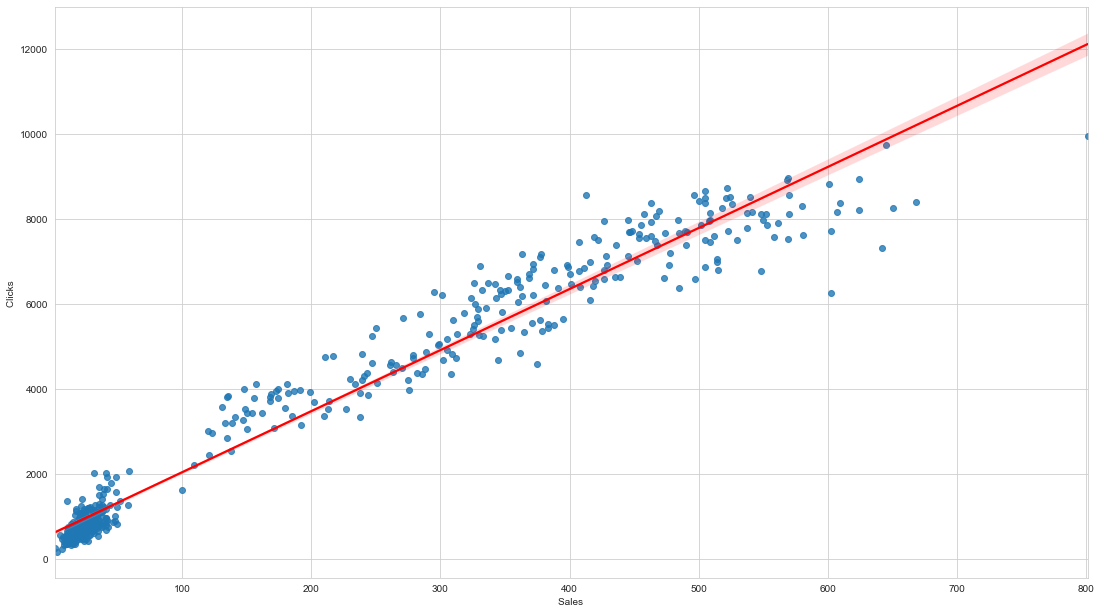

In [42]:
sns.set_style('whitegrid')

g = sns.regplot(x=Brand_df['Sales '],y=Brand_df['Clicks '], x_ci=[0,2],line_kws={"color": "red"})
g.figure.set_size_inches(18.5,10.5)

In [45]:
Brand_df['Date'] = pd.to_datetime(Brand_df['Date'], format= '%m/%d/%Y')

In [46]:
#test_df = Brand_df[Brand_df['Date'] >= '2020-10-01'] # create testing data set 
train_df = Brand_df[Brand_df['Date'] < '2020-10-01'] # create training data set

In [188]:
test_df

,Date,Weekday,Cost,Impressions,Clicks,CPC,CTR,Close Rate,Quotes,Sales,CPQ,CPS
306,2020-10-01,5,7137.4200,12477,1070,6.670486,0.085758,0.159817,219,35,32.590959,203.926286
307,2020-10-01,5,107576.8062,15182,7598,14.158569,0.500461,0.156575,3270,512,32.898106,210.110950
308,2020-10-02,6,6074.5900,8891,802,7.574302,0.090204,0.209184,196,41,30.992806,148.160732
309,2020-10-02,6,105633.8900,15002,7631,13.842732,0.508666,0.180099,3226,581,32.744541,181.813924
310,2020-10-03,7,3436.7400,13664,634,5.420726,0.046399,0.159091,132,21,26.035909,163.654286
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2020-12-29,3,67279.3900,11084,4868,13.820746,0.439192,0.120166,2405,289,27.974798,232.800657
486,2020-12-30,4,4580.9800,3913,675,6.786637,0.172502,0.158974,195,31,23.492205,147.773548
487,2020-12-30,4,72092.1600,12529,5442,13.247365,0.434352,0.138167,2772,383,26.007273,188.230183
488,2020-12-31,5,4666.8700,3713,693,6.734300,0.186642,0.188073,218,41,21.407661,113.826098


In [48]:
train_df.head(10)

,Date,Weekday,Cost,Impressions,Clicks,CPC,CTR,Close Rate,Quotes,Sales,CPQ,CPS
0,2020-05-01,5,7569.1900,7837,1230,6.153813,0.156948,0.179856,278,50,27.227302,151.383800
1,2020-05-01,5,106154.7352,18778,9960,10.658106,0.530408,0.176743,4532,801,23.423375,132.527759
2,2020-05-02,6,3723.8700,6590,840,4.433179,0.127466,0.122222,180,22,20.688167,169.266818
3,2020-05-02,6,62389.1917,11725,6395,9.755933,0.545416,0.152852,3173,485,19.662525,128.637509
4,2020-05-03,7,4050.9500,8439,1033,3.921539,0.122408,0.097143,175,17,23.148286,238.291177
5,2020-05-03,7,47360.6950,9861,5264,8.997093,0.533820,0.095514,2586,247,18.314267,191.743704
6,2020-05-04,1,7040.7500,17472,2082,3.381724,0.119162,0.179878,328,59,21.465701,119.334746
7,2020-05-04,1,94501.6400,18661,9754,9.688501,0.522694,0.145730,4426,645,21.351478,146.514171
8,2020-05-05,2,6466.7200,9611,1282,5.044243,0.133389,0.148148,297,44,21.773468,146.970909
9,2020-05-05,2,83354.9094,16084,8496,9.811077,0.528227,0.129090,3912,505,21.307492,165.059226


### create weekdays table for Train & Test

In [138]:
### testing dataset weekdays table 
test_df_Mon = test_df[test_df['Weekday'] == 1]
test_df_Tue = test_df[test_df['Weekday'] == 2]
test_df_Wed = test_df[test_df['Weekday'] == 3]
test_df_Thu = test_df[test_df['Weekday'] == 4]
test_df_Fri = test_df[test_df['Weekday'] == 5]
test_df_Sat = test_df[test_df['Weekday'] == 6]
test_df_Sun = test_df[test_df['Weekday'] == 7]

In [52]:
### Training dataset weekdays table 
train_df_Mon = train_df [train_df['Weekday'] == 1]
train_df_Tue = train_df [train_df['Weekday'] == 2]
train_df_Wed = train_df [train_df['Weekday'] == 3]
train_df_Thu = train_df [train_df['Weekday'] == 4]
train_df_Fri = train_df [train_df['Weekday'] == 5]
train_df_Sat = train_df [train_df['Weekday'] == 6]
train_df_Sun = train_df [train_df['Weekday'] == 7]

### Monday

In [53]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
X_train_Mon = np.array(train_df_Mon['Clicks '])
Y_train_Mon = np.array(train_df_Mon['Sales '])
X_test_Mon = np.array(test_df_Mon['Clicks '])
Y_test_Mon = np.array(test_df_Mon['Sales '])

In [55]:
# Create linear regression object
regr_Mon = linear_model.LinearRegression()

# Train the model using the training sets
regr_Mon.fit(X_train_Mon.reshape(-1,1), Y_train_Mon.reshape(-1,1))


LinearRegression()

In [208]:
###print('Coefficients: \n', regr.coef_)

In [56]:
# Make predictions using the testing set
y_pred_Mon = regr_Mon.predict(X_test_Mon.reshape(-1, 1))

In [210]:
##prediction_Mon = pd.DataFrame(y_pred_Mon, columns=['sales_pred']).to_csv('prediction_Mon.csv')

### Tuesday

In [57]:
X_train_Tue = np.array(train_df_Tue['Clicks '])
Y_train_Tue = np.array(train_df_Tue['Sales '])
X_test_Tue = np.array(test_df_Tue['Clicks '])
Y_test_Tue = np.array(test_df_Tue['Sales '])

In [58]:
# Create linear regression object
regr_Tue = linear_model.LinearRegression()

# Train the model using the training sets
regr_Tue.fit(X_train_Tue.reshape(-1,1), Y_train_Tue.reshape(-1,1))


LinearRegression()

In [59]:
# Make predictions using the testing set
y_pred_Tue = regr_Tue.predict(X_test_Tue.reshape(-1, 1))

In [214]:
#prediction_Tue = pd.DataFrame(y_pred_Tue, columns=['sales_pred']).to_csv('prediction_Tue.csv')

### Wednesday 

In [60]:
X_train_Wed = np.array(train_df_Wed['Clicks '])
Y_train_Wed = np.array(train_df_Wed['Sales '])
X_test_Wed = np.array(test_df_Wed['Clicks '])
Y_test_Wed = np.array(test_df_Wed['Sales '])

In [61]:
# Create linear regression object
regr_Wed = linear_model.LinearRegression()

# Train the model using the training sets
regr_Wed.fit(X_train_Wed.reshape(-1,1), Y_train_Wed.reshape(-1,1))


LinearRegression()

In [62]:
# Make predictions using the testing set
y_pred_Wed = regr_Wed.predict(X_test_Wed.reshape(-1, 1))

In [218]:
#prediction_Wed = pd.DataFrame(y_pred_Wed, columns=['sales_pred']).to_csv('prediction_Wed.csv')

### Thursday  

In [63]:
X_train_Thu = np.array(train_df_Thu['Clicks '])
Y_train_Thu = np.array(train_df_Thu['Sales '])
X_test_Thu = np.array(test_df_Thu['Clicks '])
Y_test_Thu = np.array(test_df_Thu['Sales '])

In [64]:
# Create linear regression object
regr_Thu = linear_model.LinearRegression()

# Train the model using the training sets
regr_Thu.fit(X_train_Thu.reshape(-1,1), Y_train_Thu.reshape(-1,1))


LinearRegression()

In [65]:
# Make predictions using the testing set
y_pred_Thu = regr_Thu.predict(X_test_Thu.reshape(-1, 1))

In [222]:
#prediction_Thu = pd.DataFrame(y_pred_Thu, columns=['sales_pred']).to_csv('prediction_Thu.csv')

### Firday

In [66]:
X_train_Fri = np.array(train_df_Fri['Clicks '])
Y_train_Fri = np.array(train_df_Fri['Sales '])
X_test_Fri = np.array(test_df_Fri['Clicks '])
Y_test_Fri = np.array(test_df_Fri['Sales '])

In [67]:
# Create linear regression object
regr_Fri = linear_model.LinearRegression()

# Train the model using the training sets
regr_Fri.fit(X_train_Fri.reshape(-1,1), Y_train_Fri.reshape(-1,1))


LinearRegression()

In [68]:
# Make predictions using the testing set
y_pred_Fri = regr_Fri.predict(X_test_Fri.reshape(-1, 1))

In [226]:
#prediction_Fri = pd.DataFrame(y_pred_Fri, columns=['sales_pred']).to_csv('prediction_Fri.csv')

### Sat.  

In [69]:
X_train_Sat = np.array(train_df_Sat['Clicks '])
Y_train_Sat = np.array(train_df_Sat['Sales '])
X_test_Sat = np.array(test_df_Sat['Clicks '])
Y_test_Sat = np.array(test_df_Sat['Sales '])

In [70]:
# Create linear regression object
regr_Sat = linear_model.LinearRegression()

# Train the model using the training sets
regr_Sat.fit(X_train_Sat.reshape(-1,1), Y_train_Sat.reshape(-1,1))


LinearRegression()

In [71]:
# Make predictions using the testing set
y_pred_Sat = regr_Sat.predict(X_test_Sat.reshape(-1, 1))

In [230]:
#prediction_Sat = pd.DataFrame(y_pred_Sat, columns=['sales_pred']).to_csv('prediction_Sat.csv')

### Sunday  

In [72]:
X_train_Sun = np.array(train_df_Sun['Clicks '])
Y_train_Sun = np.array(train_df_Sun['Sales '])
X_test_Sun = np.array(test_df_Sun['Clicks '])
Y_test_Sun = np.array(test_df_Sun['Sales '])

In [73]:
# Create linear regression object
regr_Sun = linear_model.LinearRegression()

# Train the model using the training sets
regr_Sun.fit(X_train_Sun.reshape(-1,1), Y_train_Sun.reshape(-1,1))


LinearRegression()

In [74]:
# Make predictions using the testing set
y_pred_Sun = regr_Sun.predict(X_test_Sun.reshape(-1, 1))

In [234]:
#prediction_Sun = pd.DataFrame(y_pred_Sun, columns=['sales_pred']).to_csv('prediction_Sun.csv')

## Print Tables

In [75]:
list_Mon = zip(X_test_Mon, Y_test_Mon,y_pred_Mon)
list_Tue = zip(X_test_Tue, Y_test_Tue,y_pred_Tue)
list_Wed = zip(X_test_Wed, Y_test_Wed,y_pred_Wed)
list_Thu = zip(X_test_Thu, Y_test_Thu,y_pred_Thu)
list_Fri = zip(X_test_Fri, Y_test_Fri,y_pred_Fri)
list_Sat = zip(X_test_Sat, Y_test_Sat,y_pred_Sat)
list_Sun = zip(X_test_Sun, Y_test_Sun,y_pred_Sun)

In [76]:
Monday = pd.DataFrame(list_Mon, columns=('Clicks_actual', 'Sale_actual','Sale_pred'))
Tuesday = pd.DataFrame(list_Tue, columns=('Clicks_actual', 'Sale_actual','Sale_pred'))
Wednesday = pd.DataFrame(list_Wed, columns=('Clicks_actual', 'Sale_actual','Sale_pred'))
Thursday = pd.DataFrame(list_Thu, columns=('Clicks_actual', 'Sale_actual','Sale_pred'))
Friday = pd.DataFrame(list_Fri, columns=('Clicks_actual', 'Sale_actual','Sale_pred'))
Saturday = pd.DataFrame(list_Sat, columns=('Clicks_actual', 'Sale_actual','Sale_pred'))
Sunday = pd.DataFrame(list_Sun, columns=('Clicks_actual', 'Sale_actual','Sale_pred'))

In [89]:
Sunday['diff%']= (Sunday['Sale_pred']-Sunday['Sale_actual'])/Sunday['Sale_actual']
Sunday

,Clicks_actual,Sale_actual,Sale_pred,diff%
0,3508,199,[165.0434868482217],[-0.17063574448129798]
1,434,14,[4.754393871733107],[-0.6604004377333494]
2,3361,206,[157.3783935926772],[-0.2360272155695281]
3,425,17,[4.28510244792426],[-0.7479351501221023]
4,2070,116,[90.06114602187473],[-0.22361081015625228]
5,351,12,[0.4264840743848488],[-0.9644596604679293]
6,2264,102,[100.17698337953212],[-0.017872711965371397]
7,466,15,[6.4229856008312325],[-0.5718009599445845]
8,2031,87,[88.0275498520364],[0.011810917839498862]
9,394,12,[2.668654210360451],[-0.7776121491366291]


In [238]:
Monday.to_csv('prediction_Monday.csv')

In [239]:
Tuesday.to_csv('prediction_Tuesday.csv')
Wednesday.to_csv('prediction_Wednesday.csv')
Thursday.to_csv('prediction_Thursday.csv')
Friday.to_csv('prediction_Friday.csv')
Saturday.to_csv('prediction_Saturday.csv')
Sunday.to_csv('prediction_Sunday.csv')

## TEST ON 2021-01 DATA 

In [49]:
test_df = pd.read_csv('CS_Brand Search_2021-Jan.csv')

In [50]:
test_df

,Date,Weekday,Cost,Impressions,Clicks,CPC,CTR,Close Rate,Quotes,CPQ,CPS,Sales
0,1/1/2021,5,60410.70,9396,4642,13.013938,0.494040,0.133862,2271,26.600925,198.719408,304
1,1/1/2021,5,3357.29,2805,479,7.008956,0.170766,0.194631,149,22.532148,115.768621,29
2,1/2/2021,6,65864.72,10234,4783,13.770587,0.467364,0.137917,2458,26.796062,194.291209,339
3,1/2/2021,6,3379.46,2943,508,6.652480,0.172613,0.149425,174,19.422184,129.979231,26
4,1/3/2021,7,42828.02,7750,3508,12.208672,0.452645,0.107451,1852,23.125281,215.216181,199
...,...,...,...,...,...,...,...,...,...,...,...,...
57,1/29/2021,5,5342.11,4688,744,7.180255,0.158703,0.000000,0,0.000000,0.000000,25
58,1/30/2021,6,24717.50,8585,2813,8.786882,0.327665,0.306122,49,504.438775,1647.833333,202
59,1/30/2021,6,3131.39,3248,487,6.429959,0.149938,0.000000,0,0.000000,0.000000,21
60,1/31/2021,7,15069.47,6663,2031,7.419729,0.304818,0.111111,18,837.192778,7534.735000,87


In [51]:
test_df_Mon = test_df[test_df['Weekday'] == 1]
test_df_Tue = test_df[test_df['Weekday'] == 2]
test_df_Wed = test_df[test_df['Weekday'] == 3]
test_df_Thu = test_df[test_df['Weekday'] == 4]
test_df_Fri = test_df[test_df['Weekday'] == 5]
test_df_Sat = test_df[test_df['Weekday'] == 6]
test_df_Sun = test_df[test_df['Weekday'] == 7]